# Time plots

### Some time series from ‘astsa’
jj, flu, globtemp, globtempl, star

## Johnson and Johnson Quarterly Earnings (jj)

In [2]:
require(astsa)
help(astsa)

In [3]:
help(jj)
# it is already time series so we dont need to use ts()

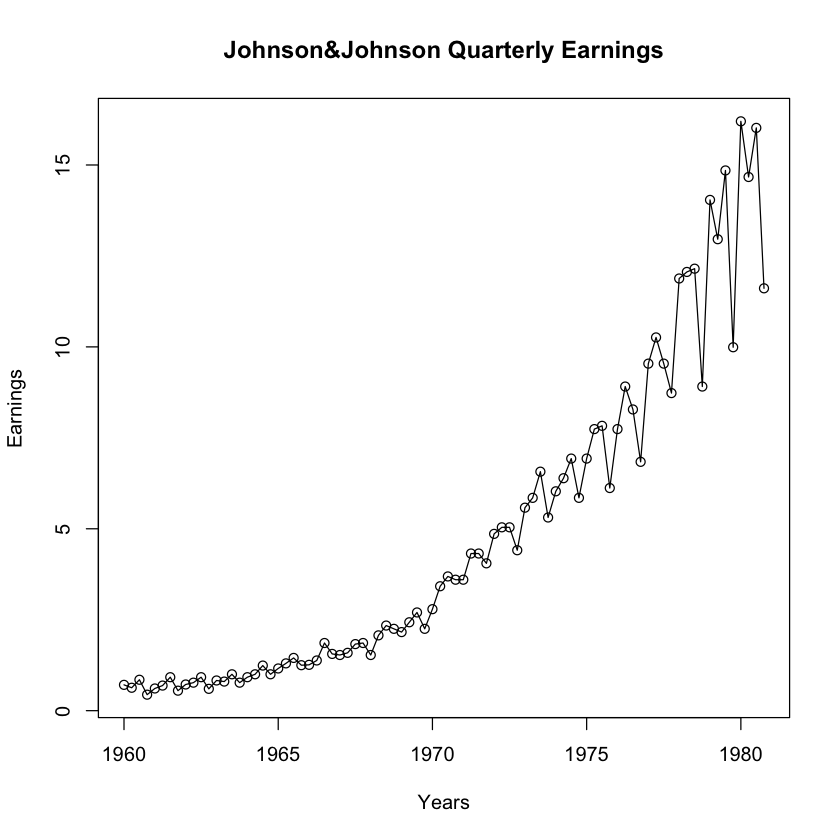

In [5]:
plot(jj, type='o',
    main='Johnson&Johnson Quarterly Earnings',
    ylab='Earnings',
    xlab='Years')
# variation grows as time pass by
# which violates stationarity

## Pneumonia and influenza deaths in the U.S. (flu)
- Monthly pneumonia and influenza deaths per 10,000 people
- 11 years
- From 1968 to 1978

In [6]:
help(flu)

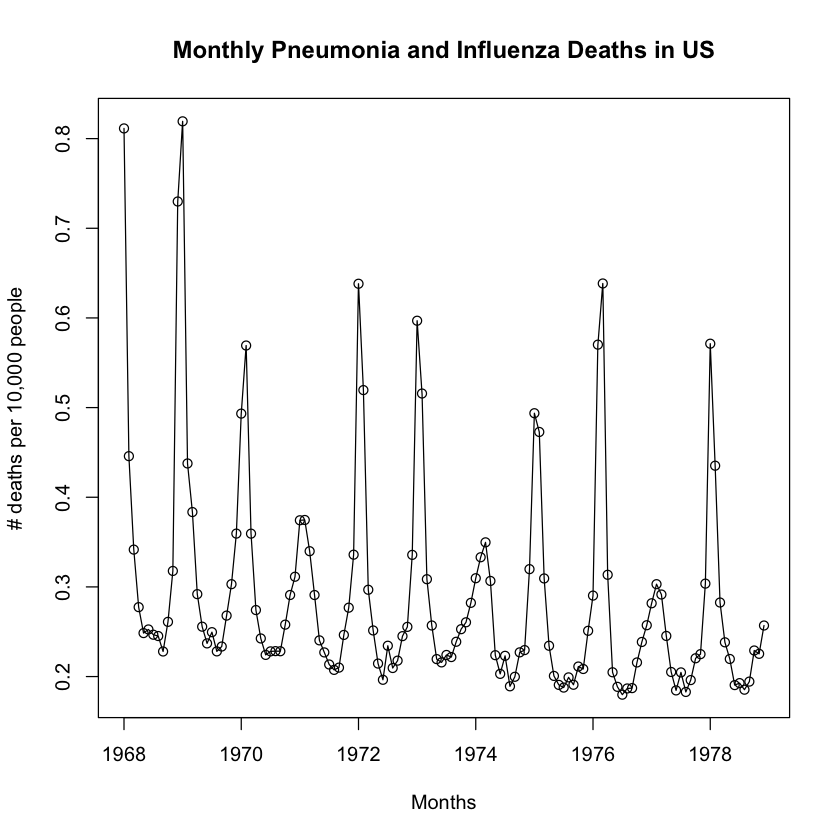

In [9]:
plot(flu, type='o',
    main='Monthly Pneumonia and Influenza Deaths in US',
    ylab='# deaths per 10,000 people',
    xlab='Months')
# peaks

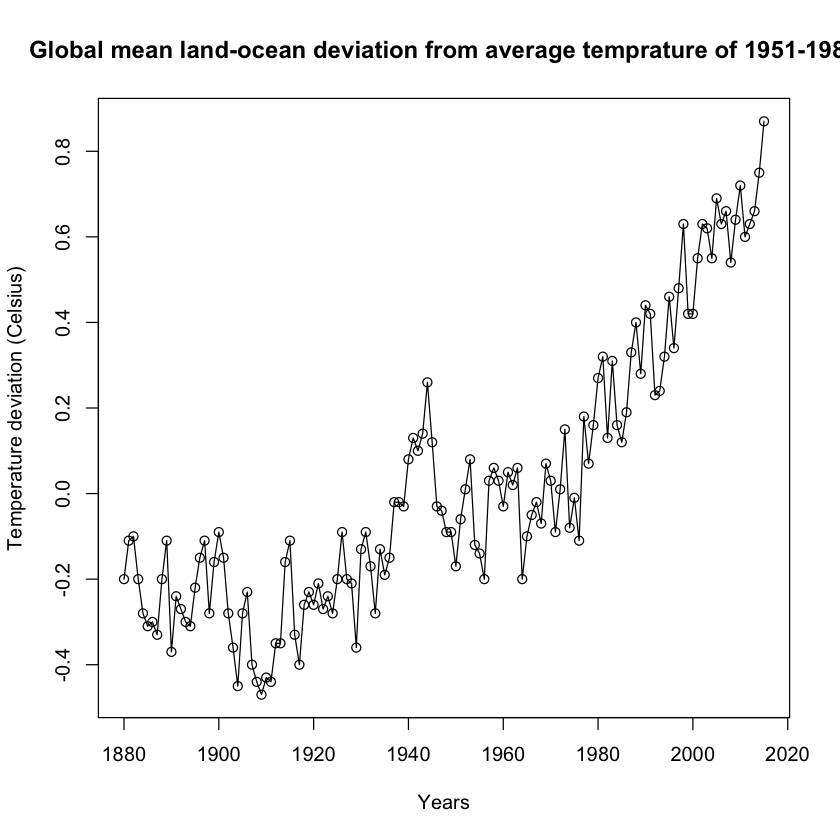

In [10]:
# Land-ocean temperature deviations
plot(globtemp, type='o',
     main='Global mean land-ocean deviation from average temprature of 1951-1980',
     ylab='Temperature deviation (Celsius)',
     xlab='Years')
# Land-only temperature deviations (globtempl)

## Variable Star (star)
- The magnitude of a star taken at midnight
- For 600 consecutive days
- The data are from “The Calculus of Observations, a Treatise on Numerical Mathematics”, by E.T. Whittaker and G. Robinson

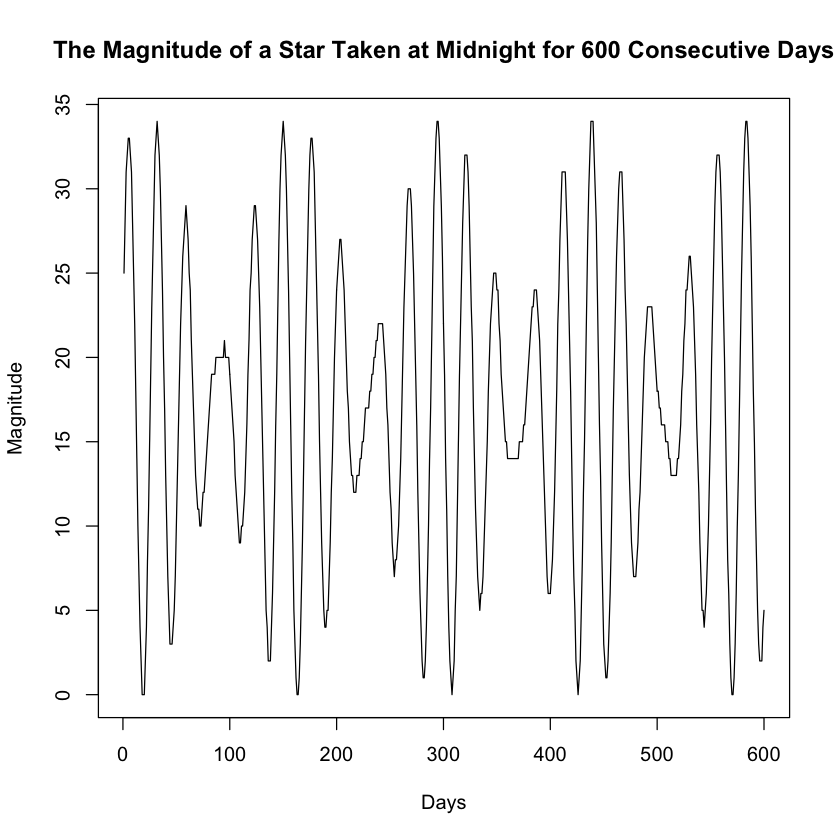

In [12]:
plot(star, main='The Magnitude of a Star Taken at Midnight for 600 Consecutive Days', ylab='Magnitude', xlab='Days')

# (Weak) Staionarity
Intuition: The properties of one section of a data are much like the properties of the other sections of the data.
- No systematic change in mean, i.e., No trend
- No systematic change in variation
- No periodic fluctuations

For an non-stationary time series, we will do some transformations to get stationary time series.

# Autocovariance function
Time series as a realization of a stochastic process. ($s<t$)

Assume stationary time series,

$\gamma(s,t) = Cov(X_s, X_t) = E[(X_s-\mu_s)(X_t-\mu_t)]$

$\gamma(t,t) = Var(X_t) = \sigma_t^2$

$\gamma_k = \gamma(t,t+k) = Cov(X_t, X_{t+k})\approx c_k$

$k$ is time difference, $c_k$ is the autocovariance coefficient (estimation of $\gamma_k$).

### Autocovariance coefficients

```R
acf(time_series, type='covariance')
```

In [15]:
pure_random_process = ts(rnorm(100)) # this is stationary
print(pure_random_process)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1] -1.835622139 -0.549879227 -0.467528663  1.968084405  1.653861872
  [6] -0.745675419 -0.716262270  0.883447515  0.060351706 -0.113718275
 [11]  1.349975576 -0.434016958  0.838496061  0.288195952  0.772822504
 [16]  0.600399391  0.485420290  0.229460360  0.764444584  1.027276378
 [21] -1.145373186 -0.255283482  0.048061997 -0.305168190 -0.457768073
 [26]  0.398041865 -0.460268538  1.007258343 -0.723228215 -1.658985007
 [31]  1.329467227 -0.863122855 -0.884853014  0.533550930 -1.382176934
 [36]  0.199297356 -1.125635999 -0.874037617  0.030636051 -0.922930156
 [41] -0.719328028 -0.216978414 -0.466824720 -0.406443703 -1.973426522
 [46]  0.198169686  0.747195219  0.023017272  1.664065189 -0.133581335
 [51] -0.993535563 -0.602422590 -1.798421028  0.955111694  1.433263624
 [56]  0.218868319 -0.250444134 -0.473801313  1.735468360  1.472740140
 [61] -0.289721709  0.268457303  0.729679398  0.214143385 -2.453117831
 [66] -0.566464645 -1.30350


Autocovariances of series ‘pure_random_process’, by lag

       0        1        2        3        4        5        6        7 
 0.96586  0.11539 -0.05535 -0.02235 -0.09574  0.11288  0.03353 -0.00653 
       8        9       10       11       12       13       14       15 
 0.05254 -0.08898 -0.16852  0.01297  0.00743  0.07875  0.01418  0.14718 
      16       17       18       19       20 
 0.01453 -0.10521 -0.01543 -0.06911  0.10088 

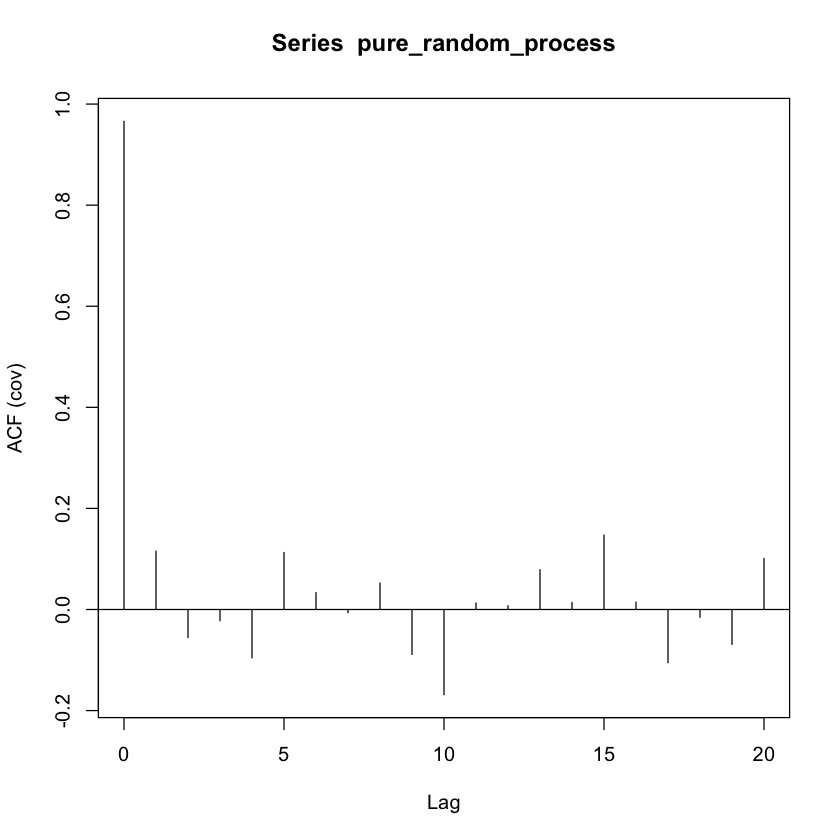

In [18]:
(acf(pure_random_process, type='covariance'))

# Autocorrelation Function (ACF)
We assume weak stationarity.

The autocorrelation coefficient between $X_t$ and $X_{t+k}$ is defined by
$$-1\le \rho_k=\frac{\gamma_k}{\gamma_0}\le 1$$
Estimation of autocorrelation coefficient at lag $k$
$$r_k = \frac{c_k}{c_0}$$

### `acf()` routine
- It plots autocorrelation coefficients at different lags: Correlogram
- It always starts at 1 since $r_0 = \dfrac{c_0}{c_0}=1$

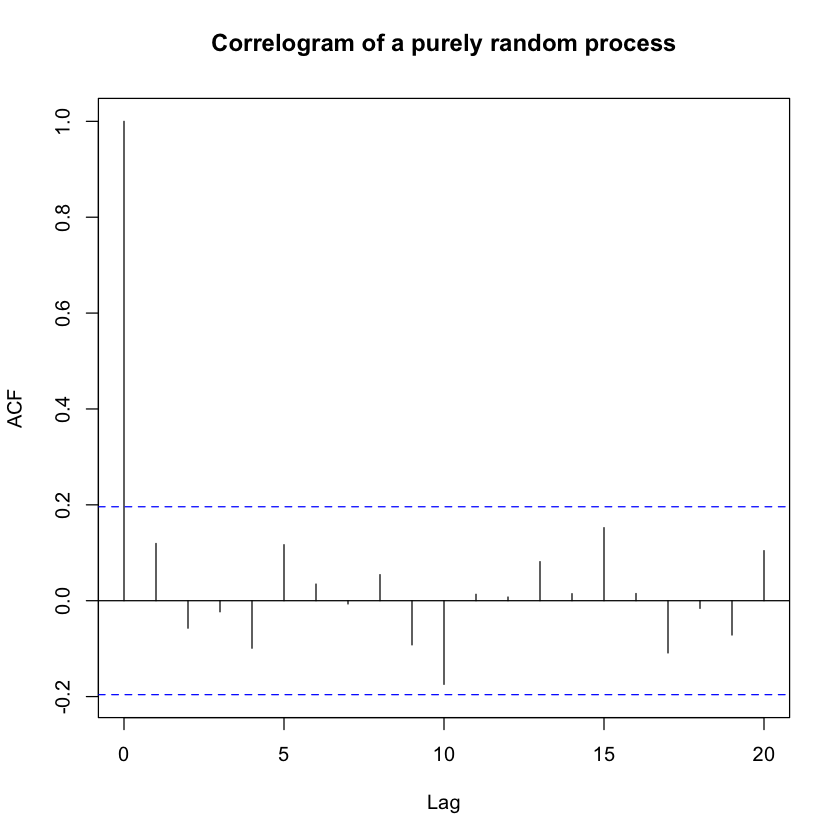

In [19]:
# put this inside () to see the coefficients
acf(pure_random_process, main='Correlogram of a purely random process')

# Random Walk
Not stationary.

Simulation:
- $X_1=0$
- $Z_t\sim N(0,1)$
- $X_t = X_{t-1}+Z_t$ for $t=2,3,...,1000$
- Plot and `acf()`

In [20]:
x=NULL
x[1]=0
for(i in 2:1000){
    x[i] = x[i-1] + rnorm(1)
}

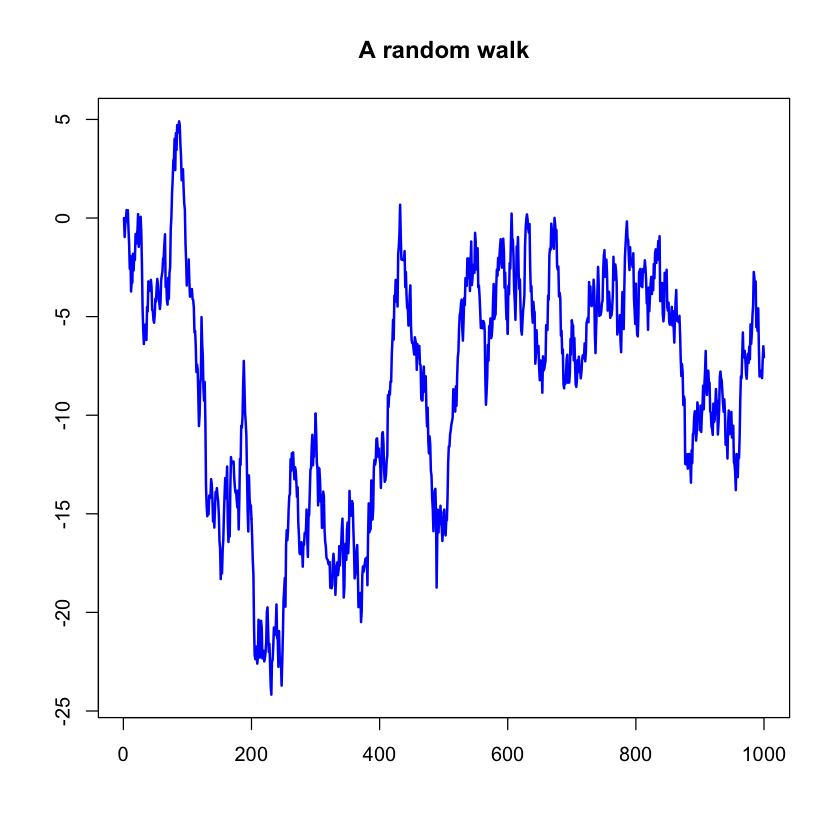

In [22]:
randomWalk = ts(x)
plot(randomWalk, main='A random walk', xlab='', ylab='',col='blue', lwd=2)

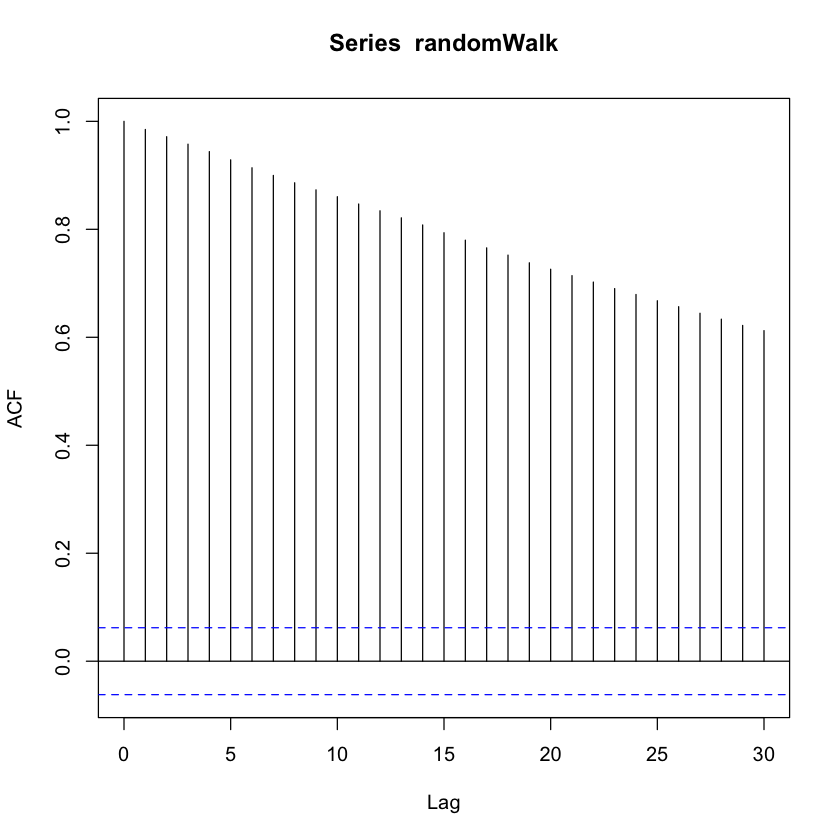

In [23]:
acf(randomWalk)

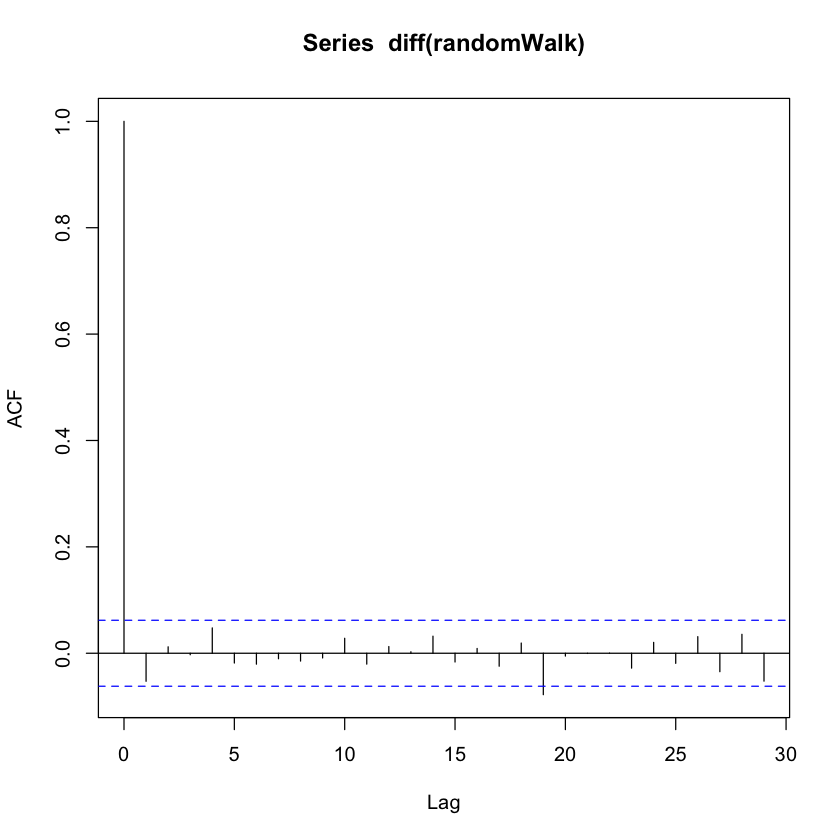

In [26]:
# but X_t - X_{t-1} is stationary (purely random process)
acf(diff(randomWalk))

# Moving Average Processes
### Simulating MA(2)

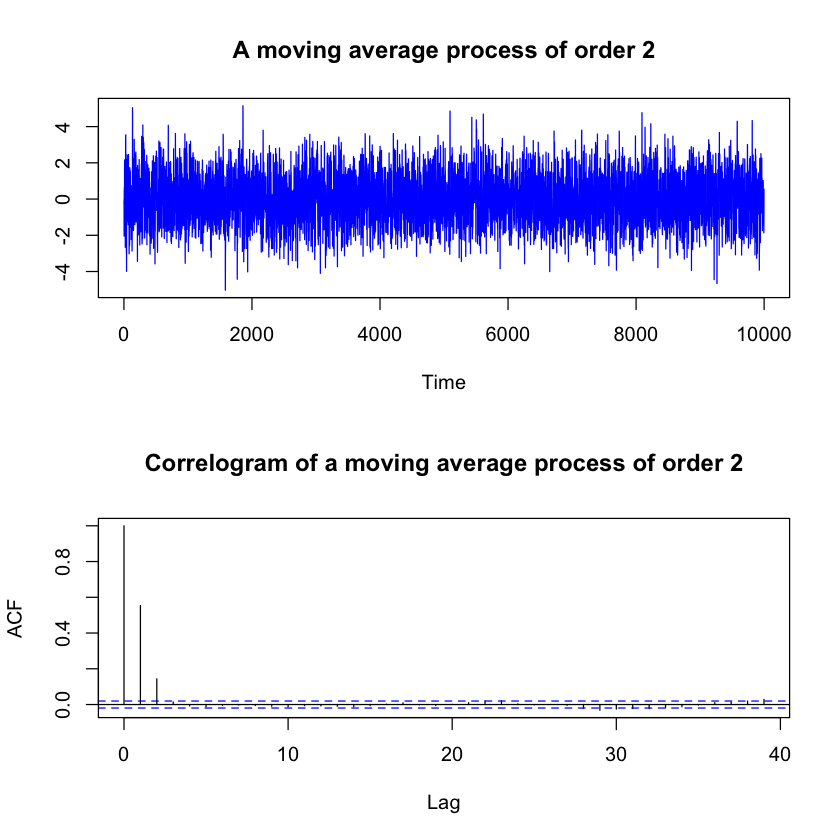

In [27]:
# Generate noise
noise=rnorm(10000)

# Introduce a variable
ma_2=NULL

# Loop for generating MA(2) process

for(i in 3:10000){
    ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
}

# Shift data to left by 2 units
moving_average_process=ma_2[3:10000]

# Put time series structure on a vanilla data
moving_average_process=ts(moving_average_process)

# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(2,1))

# plot the process and plot its ACF
plot(moving_average_process, main='A moving average process of order 2', ylab=' ', col='blue')
acf(moving_average_process, main='Correlogram of a moving average process of order 2')

Find high correlation in first two lag: order 2 ma (correlation will cut off at order q)